In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler

In [456]:
df = pd.read_csv('GA_2_dataset.csv')

In [457]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,35900,37.0,Male,Other,Strategy,23.929404,NaN,Hard,3,124,99,18,Medium
1,27085,25.0,Male,NaN,Action,22.755168,1.0,Easy,14,84,84,12,Medium
2,39595,24.0,Female,Europe,Simulation,19.505292,0.0,Hard,3,172,9,18,Medium
3,37440,26.0,Female,Europe,RPG,11.009645,NaN,NaN,3,83,36,43,Low
4,22882,17.0,Female,USA,RPG,0.581039,1.0,Medium,5,163,9,24,Medium


In [458]:
df.shape

(10000, 13)

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   10000 non-null  int64  
 1   Age                        9200 non-null   float64
 2   Gender                     10000 non-null  object 
 3   Location                   9202 non-null   object 
 4   GameGenre                  10000 non-null  object 
 5   PlayTimeHours              10000 non-null  float64
 6   InGamePurchases            9107 non-null   float64
 7   GameDifficulty             9154 non-null   object 
 8   SessionsPerWeek            10000 non-null  int64  
 9   AvgSessionDurationMinutes  10000 non-null  int64  
 10  PlayerLevel                10000 non-null  int64  
 11  AchievementsUnlocked       10000 non-null  int64  
 12  EngagementLevel            10000 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory usage

In [460]:
# Answer 1
df.select_dtypes(include='object').columns


Index(['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel'], dtype='object')

In [461]:
# Answer 2 : Method 2
count = df.query(
    'Gender == "Male" and Location == "Europe" and InGamePurchases == 1'
).shape[0]

count


299

In [462]:
#Answer 2
ans = (df["Gender"] == 'Male') & (df['Location'] == 'Europe') & (df['InGamePurchases'] == 1)
ans.sum()

np.int64(299)

In [463]:
#Answer 3
ans3= ( df['Age'] < 18 ) & (df['PlayTimeHours'] > 10)
ans3.sum()


np.int64(453)

In [464]:
X = df.drop(columns = ['EngagementLevel'])

y = df['EngagementLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [465]:
#Answer 4
df.isna().sum().sum()

np.int64(3337)

In [466]:
# Answer 5
y_train.value_counts()

EngagementLevel
Medium    3983
Low       2021
High      1996
Name: count, dtype: int64

In [467]:
X_train['Age'].unique()

array([34., 41., 48., 19., 38., 42., nan, 39., 43., 32., 33., 21., 37.,
       18., 28., 24., 17., 16., 27., 36., 25., 23., 46., 30., 44., 45.,
       47., 26., 22., 20., 40., 49., 15., 31., 35., 29.])

In [468]:
X_train.isna().sum().sum()

np.int64(2670)

In [469]:
X_train_nonull = X_train.dropna()
X_train_nonull.isna().sum().sum()

np.int64(0)

In [470]:
df.head(2)

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,35900,37.0,Male,Other,Strategy,23.929404,NaN,Hard,3,124,99,18,Medium
1,27085,25.0,Male,NaN,Action,22.755168,1.0,Easy,14,84,84,12,Medium


In [471]:
age_mean = X_train_nonull['Age'].mean()
age_mean

np.float64(31.68490499648135)

In [472]:
mean_value = X_train_nonull.select_dtypes(include = ['int64', 'float']).mean()
mean_value


PlayerID                     28748.431562
Age                             31.684905
PlayTimeHours                   12.070452
InGamePurchases                  0.199683
SessionsPerWeek                  9.406580
AvgSessionDurationMinutes       95.012315
PlayerLevel                     49.757917
AchievementsUnlocked            24.770584
dtype: float64

In [473]:
mean_values = X_train_nonull.mean(numeric_only=True)
mean_values

PlayerID                     28748.431562
Age                             31.684905
PlayTimeHours                   12.070452
InGamePurchases                  0.199683
SessionsPerWeek                  9.406580
AvgSessionDurationMinutes       95.012315
PlayerLevel                     49.757917
AchievementsUnlocked            24.770584
dtype: float64

In [474]:
median_value = X_train_nonull.select_dtypes(include = ['int64', 'float']).median()
median_value

PlayerID                     28569.500000
Age                             31.500000
PlayTimeHours                   12.103489
InGamePurchases                  0.000000
SessionsPerWeek                  9.000000
AvgSessionDurationMinutes       95.000000
PlayerLevel                     49.000000
AchievementsUnlocked            25.000000
dtype: float64

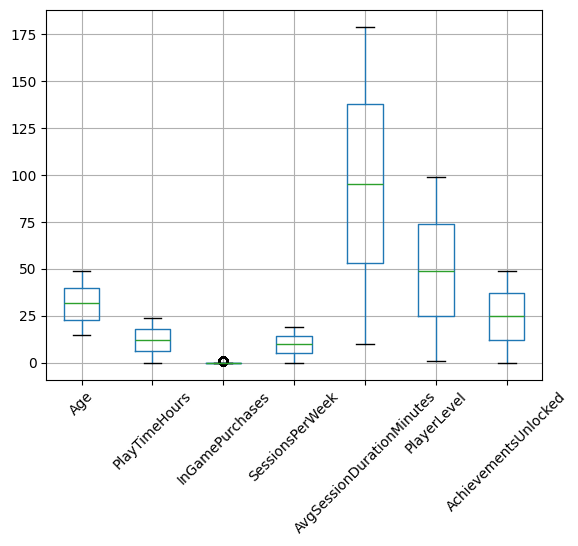

In [475]:
df.drop(columns='PlayerID').boxplot()
plt.xticks(rotation=45)
plt.show()

In [476]:
X_train.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,8000.000000,7360.000000,8000.000000,7284.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,28913.799000,31.713995,12.033934,0.199616,9.471250,95.231750,49.540875,24.731375
std,11609.682758,9.934730,6.880316,0.399739,5.759021,48.595048,28.568621,14.395820
min,9004.000000,15.000000,0.002816,0.000000,0.000000,10.000000,1.000000,0.000000
25%,18862.500000,23.000000,6.146341,0.000000,4.000000,54.000000,25.000000,12.000000
50%,28855.000000,32.000000,11.982199,0.000000,9.000000,95.000000,49.000000,25.000000
75%,38931.500000,40.000000,17.932587,0.000000,14.000000,137.000000,74.000000,37.000000
max,49032.000000,49.000000,23.997245,1.000000,19.000000,179.000000,99.000000,49.000000


In [477]:
X_train_filled = X_train.fillna(mean_values)
X_train_filled.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,28913.799000,31.711667,12.033934,0.199622,9.471250,95.231750,49.540875,24.731375
std,11609.682758,9.529010,6.880316,0.381429,5.759021,48.595048,28.568621,14.395820
min,9004.000000,15.000000,0.002816,0.000000,0.000000,10.000000,1.000000,0.000000
25%,18862.500000,24.000000,6.146341,0.000000,4.000000,54.000000,25.000000,12.000000
50%,28855.000000,31.684905,11.982199,0.000000,9.000000,95.000000,49.000000,25.000000
75%,38931.500000,39.000000,17.932587,0.199683,14.000000,137.000000,74.000000,37.000000
max,49032.000000,49.000000,23.997245,1.000000,19.000000,179.000000,99.000000,49.000000


In [478]:
# Answer 6
X_train['Age'] = X_train['Age'].fillna(mean_values['Age'])
X_test['Age'] = X_test['Age'].fillna(mean_values['Age'])
X_test['Age'].sum().round(2)


np.float64(63580.58)

In [479]:
df['Location'].replace(['Unknown', np.nan], 'Other')
df['Location'].value_counts()

Location
USA       3706
Europe    2754
Asia      1850
Other      892
Name: count, dtype: int64

In [480]:
df['GameDifficulty'].unique()

array(['Hard', 'Easy', nan, 'Medium'], dtype=object)

In [481]:
df['GameDifficulty'].replace(np.nan, df['GameDifficulty'].mode()[0]).unique()

array(['Hard', 'Easy', 'Medium'], dtype=object)

In [482]:
df['InGamePurchases'].unique()

array([nan,  1.,  0.])

In [483]:
df['InGamePurchases'].replace(np.nan, 0).value_counts()
df['InGamePurchases'].value_counts()

InGamePurchases
0.0    7244
1.0    1863
Name: count, dtype: int64

In [484]:
X_train.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,8000.000000,8000.000000,8000.000000,7284.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,28913.799000,31.711667,12.033934,0.199616,9.471250,95.231750,49.540875,24.731375
std,11609.682758,9.529010,6.880316,0.399739,5.759021,48.595048,28.568621,14.395820
min,9004.000000,15.000000,0.002816,0.000000,0.000000,10.000000,1.000000,0.000000
25%,18862.500000,24.000000,6.146341,0.000000,4.000000,54.000000,25.000000,12.000000
50%,28855.000000,31.684905,11.982199,0.000000,9.000000,95.000000,49.000000,25.000000
75%,38931.500000,39.000000,17.932587,0.000000,14.000000,137.000000,74.000000,37.000000
max,49032.000000,49.000000,23.997245,1.000000,19.000000,179.000000,99.000000,49.000000


In [485]:
X_test.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,2000.000000,2000.000000,2000.000000,1823.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,29021.969500,31.790292,12.020846,0.224355,9.63650,95.408000,50.112000,24.384000
std,11383.688692,9.622981,7.035158,0.417272,5.70672,49.922517,28.539108,14.684392
min,9061.000000,15.000000,0.003524,0.000000,0.00000,10.000000,1.000000,0.000000
25%,19481.250000,24.000000,5.948275,0.000000,5.00000,52.000000,25.000000,12.000000
50%,28960.500000,31.684905,12.008243,0.000000,10.00000,97.000000,50.000000,24.000000
75%,38519.750000,39.250000,18.151975,0.000000,15.00000,139.000000,75.000000,38.000000
max,49018.000000,49.000000,23.996451,1.000000,19.00000,179.000000,99.000000,49.000000


In [486]:
X_train = X_train.drop(columns=['PlayerID'])
X_test = X_test.drop(columns = ['PlayerID'])

In [487]:
X_train['Location'].fillna('Other', inplace = True)
X_test['Location'].fillna('Other', inplace = True)

C:\Users\jhasa\AppData\Local\Temp\ipykernel_22588\3689643051.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Location'].fillna('Other', inplace = True)
C:\Users\jhasa\AppData\Local\Temp\ipykernel_22588\3689643051.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [488]:
X_train['InGamePurchases'].fillna(0, inplace = True)
X_test['InGamePurchases'].fillna(0, inplace = True)

C:\Users\jhasa\AppData\Local\Temp\ipykernel_22588\2050677611.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['InGamePurchases'].fillna(0, inplace = True)
C:\Users\jhasa\AppData\Local\Temp\ipykernel_22588\2050677611.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [489]:
X_train['GameDifficulty'].mode()[0]

'Easy'

In [490]:
X_train['GameDifficulty'].fillna(X_train['GameDifficulty'].mode()[0], inplace = True)
X_test['GameDifficulty'].fillna(X_train['GameDifficulty'].mode()[0], inplace = True)

C:\Users\jhasa\AppData\Local\Temp\ipykernel_22588\1954029145.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['GameDifficulty'].fillna(X_train['GameDifficulty'].mode()[0], inplace = True)
C:\Users\jhasa\AppData\Local\Temp\ipykernel_22588\1954029145.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [491]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8000 non-null   float64
 1   Gender                     8000 non-null   object 
 2   Location                   8000 non-null   object 
 3   GameGenre                  8000 non-null   object 
 4   PlayTimeHours              8000 non-null   float64
 5   InGamePurchases            8000 non-null   float64
 6   GameDifficulty             8000 non-null   object 
 7   SessionsPerWeek            8000 non-null   int64  
 8   AvgSessionDurationMinutes  8000 non-null   int64  
 9   PlayerLevel                8000 non-null   int64  
 10  AchievementsUnlocked       8000 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 750.0+ KB


In [492]:
X_test['GameDifficulty'].fillna(X_train['GameDifficulty'].mode()[0], inplace = True)

In [493]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 6252 to 6929
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2000 non-null   float64
 1   Gender                     2000 non-null   object 
 2   Location                   2000 non-null   object 
 3   GameGenre                  2000 non-null   object 
 4   PlayTimeHours              2000 non-null   float64
 5   InGamePurchases            2000 non-null   float64
 6   GameDifficulty             2000 non-null   object 
 7   SessionsPerWeek            2000 non-null   int64  
 8   AvgSessionDurationMinutes  2000 non-null   int64  
 9   PlayerLevel                2000 non-null   int64  
 10  AchievementsUnlocked       2000 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 187.5+ KB


In [494]:
categories = [['Easy', 'Medium', 'Hard']]
oh_encode = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1,categories=categories)
X_train_encoded = pd.DataFrame(oh_encode.fit_transform(X_train[['GameDifficulty']]), index = X_train.index, columns = oh_encode.get_feature_names_out(['GameDifficulty']))
X_test_encoded = pd.DataFrame(oh_encode.transform(X_test[['GameDifficulty']]), index = X_test.index, columns = oh_encode.get_feature_names_out(["GameDifficulty"]))


In [495]:
X_train_encoded.head()

,GameDifficulty
9254,1.0
1561,1.0
1670,1.0
6087,0.0
6669,0.0


In [496]:
X_train.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
9254,34.0,Female,Asia,Simulation,15.777862,0.0,Medium,5,76,80,33
1561,41.0,Male,USA,Strategy,3.044182,0.0,Medium,7,73,34,5
1670,48.0,Female,USA,Simulation,0.585613,0.0,Medium,16,163,44,3
6087,19.0,Male,Europe,Action,6.194149,0.0,Easy,6,87,26,33
6669,38.0,Male,Europe,RPG,21.610488,0.0,Easy,14,116,39,14


In [497]:
One_hot_cols = ['Gender', 'Location', 'GameGenre']
one_encode = OneHotEncoder(drop='first', sparse_output = False)

X_train_onehot = pd.DataFrame(one_encode.fit_transform(X_train[One_hot_cols]), index = X_train.index, columns = one_encode.get_feature_names_out())

X_test_onehot =pd.DataFrame(one_encode.transform(X_test[One_hot_cols]), index = X_test.index, columns = one_encode.get_feature_names_out())

In [498]:
X_train_onehot.head()

,Gender_Male,Location_Europe,Location_Other,Location_USA,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy
9254,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1561,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1670,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6087,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6669,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [499]:
X_train.join(X_train_onehot).drop(columns = One_hot_cols).head()

,Age,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Male,Location_Europe,Location_Other,Location_USA,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy
9254,34.0,15.777862,0.0,Medium,5,76,80,33,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1561,41.0,3.044182,0.0,Medium,7,73,34,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1670,48.0,0.585613,0.0,Medium,16,163,44,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6087,19.0,6.194149,0.0,Easy,6,87,26,33,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6669,38.0,21.610488,0.0,Easy,14,116,39,14,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [500]:
X_train.join(X_train_onehot).drop(columns = One_hot_cols + ["GameDifficulty"])

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Male,Location_Europe,Location_Other,Location_USA,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy
9254,34.0,15.777862,0.0,5,76,80,33,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1561,41.0,3.044182,0.0,7,73,34,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1670,48.0,0.585613,0.0,16,163,44,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6087,19.0,6.194149,0.0,6,87,26,33,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6669,38.0,21.610488,0.0,14,116,39,14,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,21.0,2.698920,0.0,4,179,1,12,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5191,48.0,20.508777,1.0,12,42,64,49,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5390,19.0,9.480399,0.0,4,32,31,43,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,28.0,7.895527,0.0,4,27,99,48,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [501]:
X_test_encoded.head()

,GameDifficulty
6252,0.0
4684,0.0
1731,1.0
4742,0.0
4521,0.0


In [502]:
X_test_onehot.head()

,Gender_Male,Location_Europe,Location_Other,Location_USA,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy
6252,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4684,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1731,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4742,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4521,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [523]:
X_train_req = X_train.drop(columns=One_hot_cols + ["GameDifficulty"])
X_train_joined = X_train_req.join(X_train_encoded).join(X_train_onehot)

X_test_req = X_test.drop(columns=One_hot_cols + ["GameDifficulty"])
X_test_joined = X_test_req.join(X_test_encoded).join(X_test_onehot)

In [ ]:
# Answer 7
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train_joined)
X_test_scaled = scale.transform(X_test_joined)
req_sum = X_test_scaled[:5].sum().round(2)
req_sum

np.float64(-7.17)